# 1. Import Libary 

In [1]:
import pandas as pd
import pyodbc
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2. Import Data Frame From SQL SERVER

In [2]:
conn = pyodbc.connect( #CONNECTION
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=vti_data;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;")

df_kmeans = pd.read_sql_query(
'''                                        
SELECT *
FROM  [vti_data].[dbo].[1.Shop_Customers];                         
''', conn)
df_kmeans


<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hiep\AppData\Local\Temp\ipykernel_13800\1725891540.py:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  "SERVER=localhost\SQLEXPRESS;"
C:\Users\Hiep\AppData\Local\Temp\ipykernel_13800\1725891540.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_kmeans = pd.read_sql_query(


,CustomerID,Genre,Age,Annual_Income_k,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. CLEARNING DATA PROCESS

## 3.1 Remove Duplicate Rows

In [4]:
df_kmeans.duplicated().sum()

np.int64(0)

## 3.2 Detect & Remove Outliers Using IQR

In [ ]:
#Since our feature are categories, we don't have outlier

## 3.3 Remove Irrelevant Data Using Biz Sense

In [5]:
df_kmeans_cal = df_kmeans[['Annual_Income_k','Spending_Score_1_100']]
df_kmeans_cal

,Annual_Income_k,Spending_Score_1_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## 3.4 Standardization Capitalization

## 3.5 Covert Data Type

## 3.6 Clear Format

## 3.7 Fix Error

## 3.9 Languages Transaltion

## 3.10 Handle Missing Value

# 4. Feature Engineering 

In [6]:
df_kmeans_cal['Ratio'] = df_kmeans_cal['Spending_Score_1_100'] / df_kmeans_cal['Annual_Income_k']
df_kmeans_cal

C:\Users\Hiep\AppData\Local\Temp\ipykernel_13800\1909118475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_cal['Ratio'] = df_kmeans_cal['Spending_Score_1_100'] / df_kmeans_cal['Annual_Income_k']


,Annual_Income_k,Spending_Score_1_100,Ratio
0,15,39,2.600000
1,15,81,5.400000
2,16,6,0.375000
3,16,77,4.812500
4,17,40,2.352941
...,...,...,...
195,120,79,0.658333
196,126,28,0.222222
197,126,74,0.587302
198,137,18,0.131387


# 5. K_MEANS CLUSTER WITH BEHAVIOR SPENDING

## 1. Tìm số clusters tối ưu bằng   Elbow Method


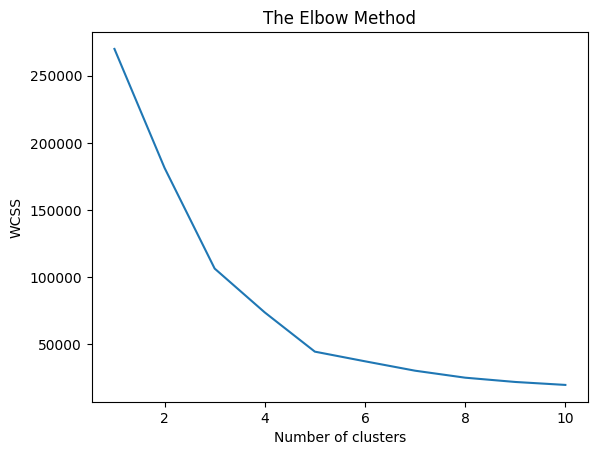

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df_kmeans_cal[['Annual_Income_k','Spending_Score_1_100']]

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 2. Sử dụng KMeans

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [10]:
#cetroids của các clusters
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

## 3. Visualising the clusters

In [11]:
y_kmeans.shape

(200,)

In [12]:
X.shape

(200, 2)

Text(0, 0.5, 'Spending Ratings (1-100)')

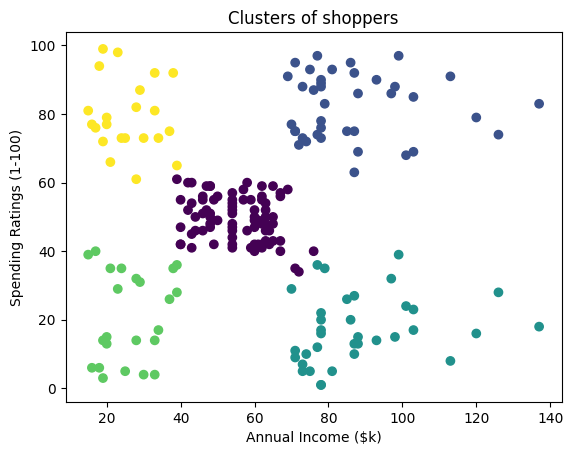

In [16]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c= y_kmeans ) #colors được xác định bằng cluster
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Ratings (1-100)')

In [18]:
df_kmeans['label'] = y_kmeans
df_kmeans['Ratio'] = df_kmeans['Spending_Score_1_100'] / df_kmeans['Annual_Income_k']

df_kmeans

,CustomerID,Genre,Age,Annual_Income_k,Spending_Score_1_100,label,Ratio
0,1,Male,19,15,39,3,2.600000
1,2,Male,21,15,81,4,5.400000
2,3,Female,20,16,6,3,0.375000
3,4,Female,23,16,77,4,4.812500
4,5,Female,31,17,40,3,2.352941
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0.658333
196,197,Female,45,126,28,2,0.222222
197,198,Male,32,126,74,1,0.587302
198,199,Male,32,137,18,2,0.131387


# 6. Save Clear Data Into Database To Visiualization ti

In [20]:
import pyodbc

# --- Connect ---
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=vti_data;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"
)
cursor = conn.cursor()

# --- Map pandas dtype -> SQL Server type ---
dtype_map = lambda dt: "INT" if pd.api.types.is_integer_dtype(dt) else \
                       "FLOAT" if pd.api.types.is_float_dtype(dt) else \
                       "BIT" if pd.api.types.is_bool_dtype(dt) else \
                       "DATETIME" if pd.api.types.is_datetime64_any_dtype(dt) else \
                       "VARCHAR(255)"

table_name = "K_Means_Shop_Customers" #

# --- Drop + Create table ---
cursor.execute(f"IF OBJECT_ID('dbo.{table_name}', 'U') IS NOT NULL DROP TABLE dbo.{table_name}")
cols = ", ".join([f"[{c}] {dtype_map(df_kmeans[c].dtype)}" for c in df_kmeans.columns]) #
cursor.execute(f"CREATE TABLE dbo.{table_name} ({cols})")

# --- Insert rows ---
cursor.fast_executemany = True
cursor.executemany(f"INSERT INTO dbo.{table_name} VALUES ({','.join(['?']*len(df_kmeans.columns))})", df_kmeans.values.tolist()) #
conn.commit()

<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hiep\AppData\Local\Temp\ipykernel_13800\1710339944.py:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  "SERVER=localhost\SQLEXPRESS;"
